In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from matplotlib import pyplot as plt
from pandas import DataFrame
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.utils import all_estimators

%matplotlib inline
warnings.filterwarnings("ignore")


In [ ]:
# загрузим данные
url='https://drive.google.com/file/d/1PmfTN46BcIEtCfV29gMZ1pPldQB5dQUQ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

df.head()

NameError: ignored

Загрузить удалось, присутствуют все колонки заявленные в описании в кегле.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


В данных нет пропусков, типы соответствуют описанию на кегле

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

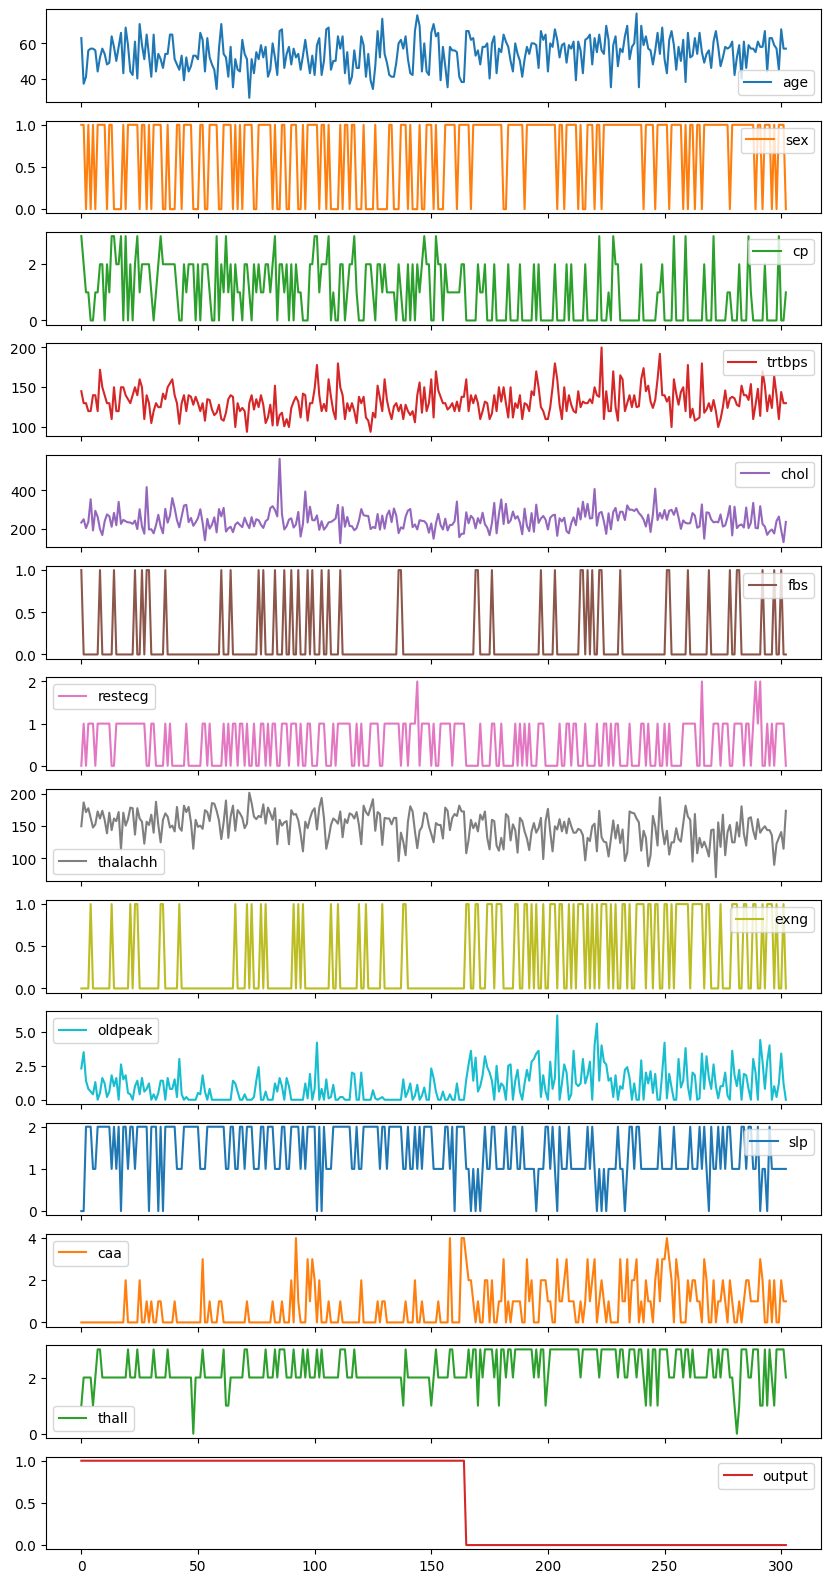

In [ ]:
df.plot(subplots=True, figsize = (10, 20))

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Есть подозрения, что выбросы имеются в следующих колонках:
 * chol: максимум --- 564, тогда как 75% значений не первышают 275
 * resteg: крайне неравномерно распределены значения, 0 и 1 примерно поровну, и а 2 -- только 4 значения

In [ ]:
print(df['restecg'].value_counts())
print(df['caa'].value_counts())
print(df['thall'].value_counts())

print(df.loc[df['chol']>400]['chol'].value_counts())
print(df.loc[df['oldpeak']>4]['oldpeak'].value_counts())

1    152
0    147
2      4
Name: restecg, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
2    166
3    117
1     18
0      2
Name: thall, dtype: int64
417    1
564    1
407    1
409    1
Name: chol, dtype: int64
4.2    2
6.2    1
5.6    1
4.4    1
Name: oldpeak, dtype: int64


In [ ]:
df_cleaned = df.loc[df['caa']!=4]
df_cleaned = df_cleaned.loc[df_cleaned['restecg'] != 2]
df_cleaned = df_cleaned.loc[df_cleaned['chol'] < 420]
df_cleaned = df_cleaned.loc[df_cleaned['oldpeak'] < 4.5]
df_cleaned = df_cleaned.loc[df_cleaned['thall'] > 0]
df_cleaned

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


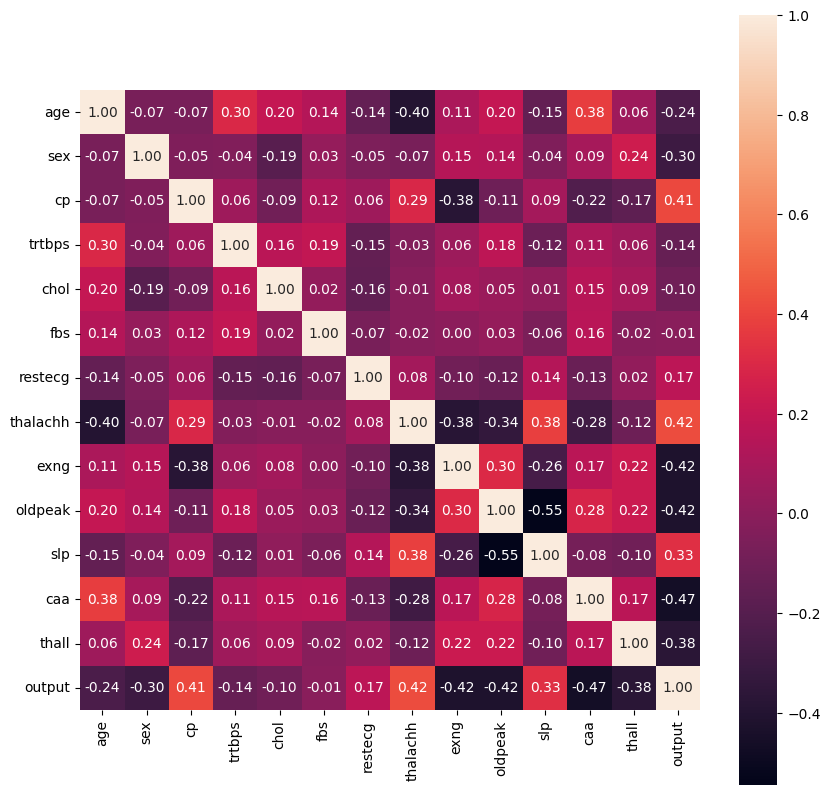

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_cleaned.corr(), fmt=".2f", annot=True, square=True)
plt.show()

Сильной корреляции между столбцами датасета не наблюдается.

In [ ]:
grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
knn = KNeighborsClassifier()

X = np.array(df_cleaned.copy().drop(columns=['output']))
y = df_cleaned['output'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)
print('точность наивного предсказания')
print(classification_report(y_test, knn.predict(X_test)))


точность наивного предсказания
              precision    recall  f1-score   support

           0       0.77      0.59      0.67        29
           1       0.67      0.83      0.74        29

    accuracy                           0.71        58
   macro avg       0.72      0.71      0.70        58
weighted avg       0.72      0.71      0.70        58



In [ ]:
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
knn.fit(X_train, y_train)
print('точность предсказания с отмасштабированными входными данными',)
print(classification_report(y_test, knn.predict(X_test)))

точность предсказания с отмасштабированными входными данными
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        32
           1       0.67      0.85      0.75        26

    accuracy                           0.74        58
   macro avg       0.75      0.75      0.74        58
weighted avg       0.76      0.74      0.74        58



Подберём гиперпараметры данного классификатора (количество соседей, метрика пространства параметров)

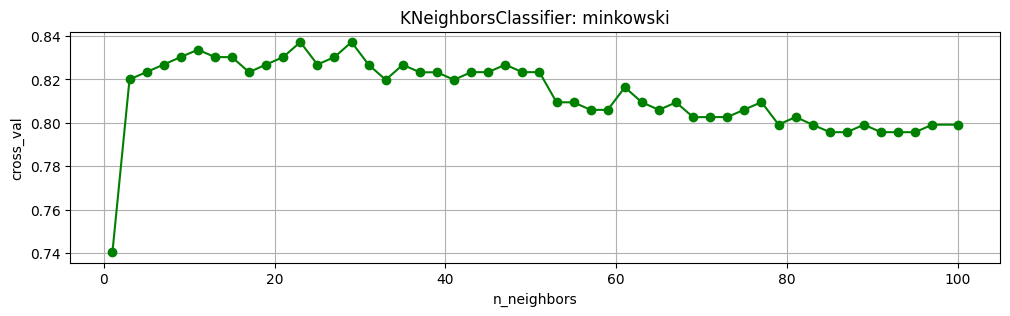

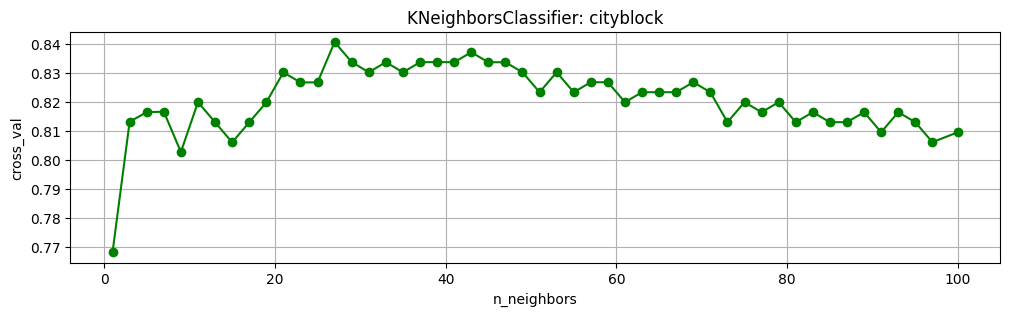

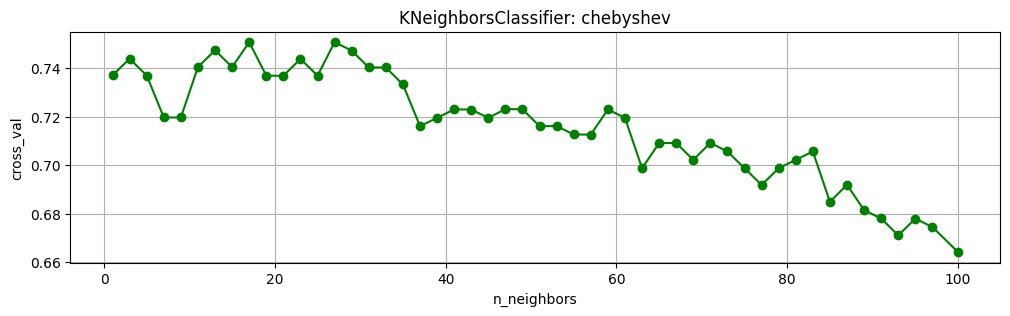

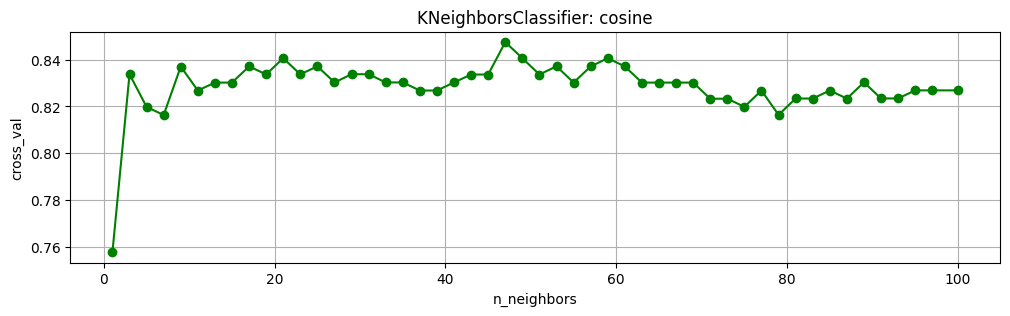

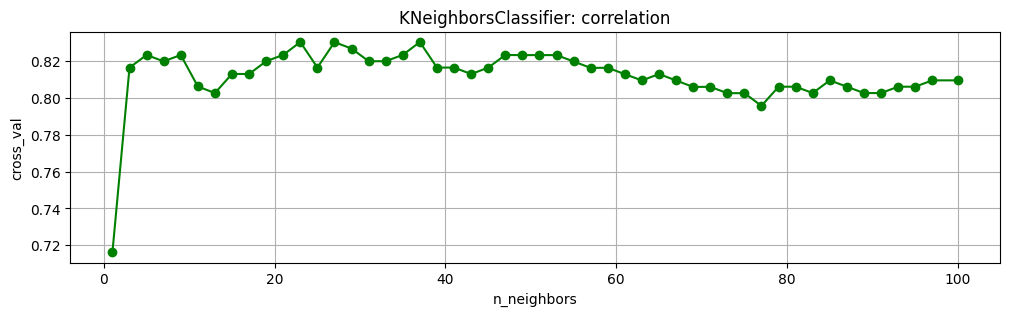

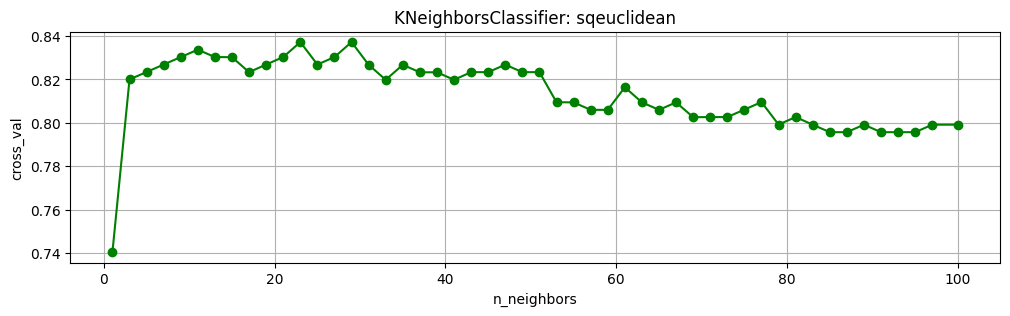

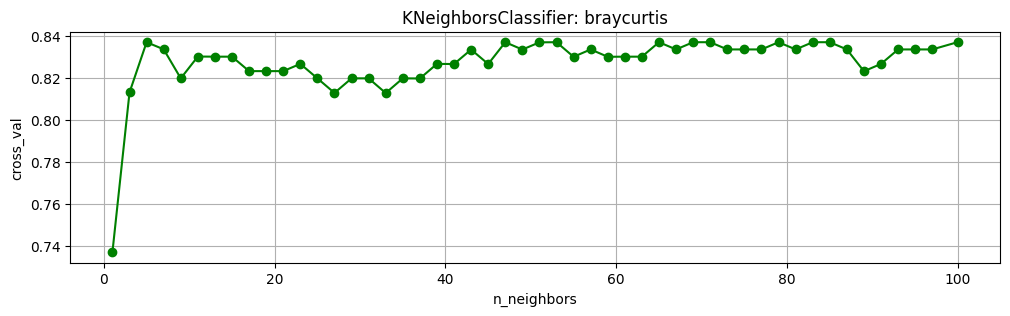

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 3))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
knn_grid = {
    'n_neighbors': np.array(np.linspace(1, 100), dtype='int'),
    'metric': ['minkowski', 'cityblock', 'chebyshev', 'cosine', 'correlation', 'sqeuclidean', 'braycurtis']
}
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs=-1)
gs.fit(X_scaled, y)
res = pd.DataFrame(gs.cv_results_)
for metric in res['param_metric'].unique():
    metrical_result = res.loc[res['param_metric']==metric]
    grid_plot(
        metrical_result['param_n_neighbors'],
        metrical_result['mean_test_score'],
        'n_neighbors',
        'KNeighborsClassifier: ' + metric
    )

In [ ]:
print(gs.best_params_, gs.best_estimator_)
print(classification_report(y_test, gs.predict(X_test)))

{'metric': 'cosine', 'n_neighbors': 47} KNeighborsClassifier(metric='cosine', n_neighbors=47)
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.78      0.96      0.86        26

    accuracy                           0.86        58
   macro avg       0.87      0.87      0.86        58
weighted avg       0.88      0.86      0.86        58



Попробуем улучшить точность прогноза за счёт ансамбля эстиматоров

In [ ]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(gs.best_estimator_, n_estimators=11)
bc.fit(X_scaled, y)
print('ансамбль после подбора гиперпараметров')
print(classification_report(y_test, bc.predict(X_test)))

ансамбль после подбора гиперпараметров
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.78      0.96      0.86        26

    accuracy                           0.86        58
   macro avg       0.87      0.87      0.86        58
weighted avg       0.88      0.86      0.86        58



Улучшение довольно специфическое (отрицательное).

А если в обратном порядке?

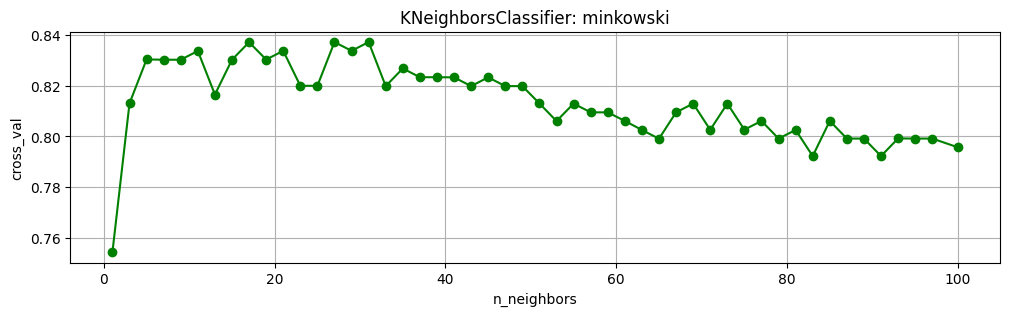

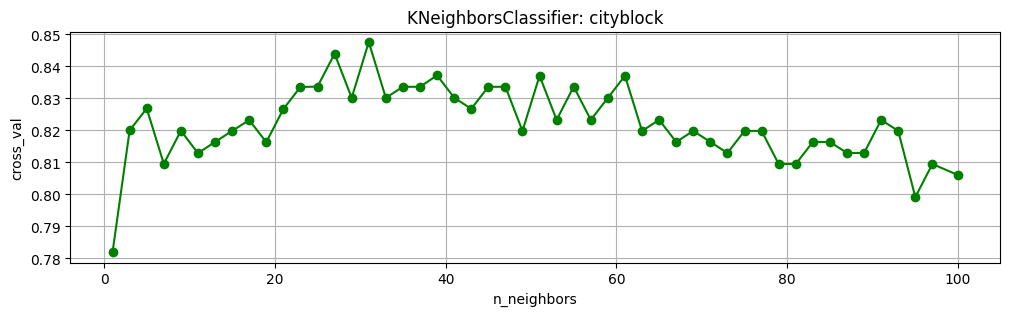

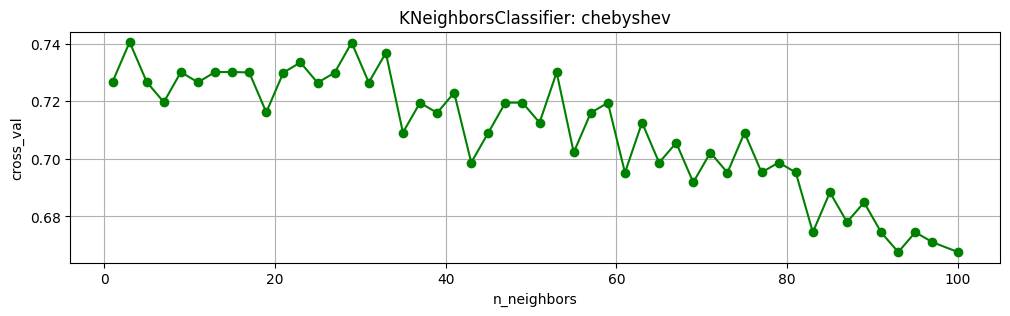

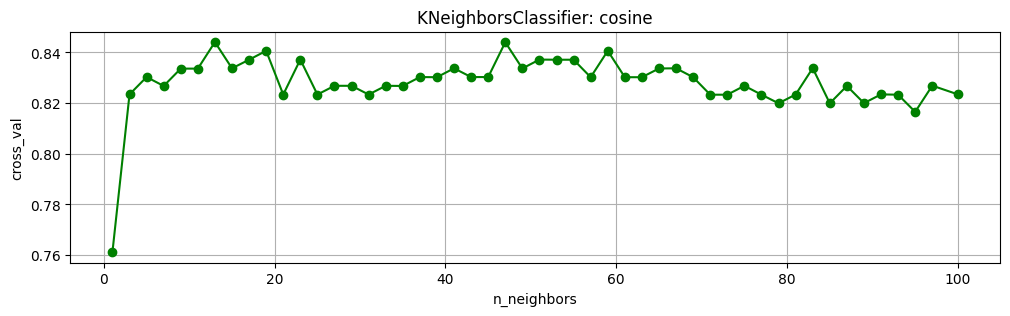

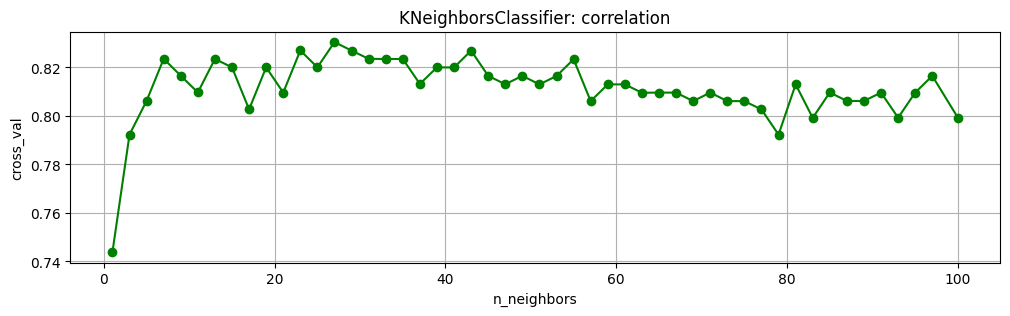

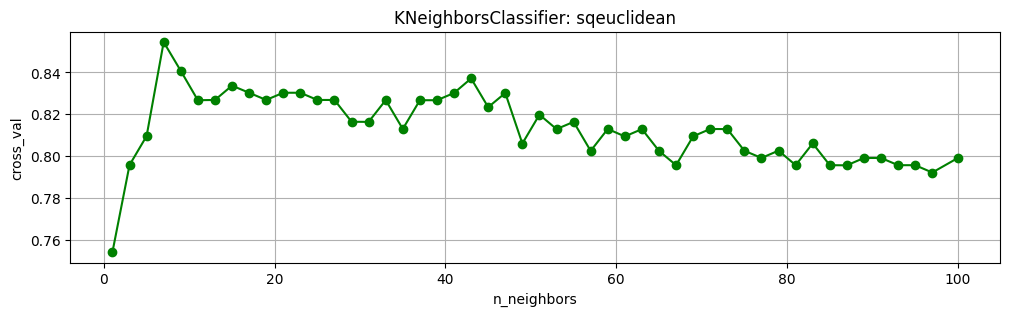

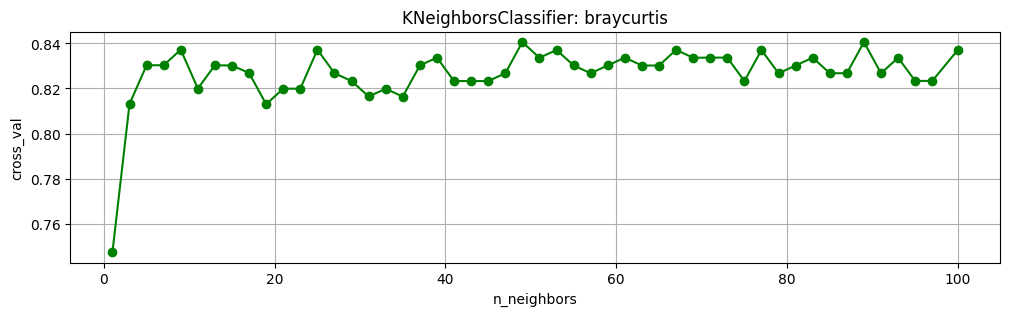

In [ ]:
knn_estimator_grid = {
    'estimator__n_neighbors': np.array(np.linspace(1, 100), dtype='int'),
    'estimator__metric': ['minkowski',
                          'cityblock',
                          'chebyshev',
                          'cosine',
                          'correlation',
                          'sqeuclidean',
                          'braycurtis']
}
# так как у нас задача бинарной классификации, то имеет смысл
# брать нечётное количество эстиматоров: тогда их голоса не
# смогут разделиться поровну
gs = GridSearchCV(BaggingClassifier(knn, n_estimators=11), knn_estimator_grid, cv=5, n_jobs=-1)
gs.fit(X_scaled, y)
res = pd.DataFrame(gs.cv_results_)
for metric in res['param_estimator__metric'].unique():
    metrical_result = res.loc[res['param_estimator__metric']==metric]
    grid_plot(
        metrical_result['param_estimator__n_neighbors'],
        metrical_result['mean_test_score'],
        'n_neighbors',
        'KNeighborsClassifier: ' + metric
    )

In [ ]:
print('подбор гиперпараметров для ансамбля эстиматоров')
print(gs.best_params_, gs.best_estimator_)
print(classification_report(y_test, gs.predict(X_test)))

подбор гиперпараметров для ансамбля эстиматоров
{'estimator__metric': 'sqeuclidean', 'estimator__n_neighbors': 7} BaggingClassifier(estimator=KNeighborsClassifier(metric='sqeuclidean',
                                                 n_neighbors=7),
                  n_estimators=11)
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.79      0.88      0.84        26

    accuracy                           0.84        58
   macro avg       0.84      0.85      0.84        58
weighted avg       0.85      0.84      0.85        58



Заметим, что лучший из ансамблей классификаторов использует другую метрику, нежели лучший из индивидуальных.

Попробуем другие классификаторы, которые предлагает sklearn:

In [ ]:
estimator_comparison = pd.DataFrame(
    dict(
        {'estimator': 'KNN_best_hyperparameters'},
        **(classification_report(y_test, gs.predict(X_test), output_dict=True)['macro avg'])),
    index=[1]
    )

estimators = {}
for est in all_estimators():
    try:
        classifier = est[1]()
        classifier.fit(X_train, y_train)
        estimator_comparison = pd.concat([
            estimator_comparison,
            DataFrame(
                dict(
                    {'estimator': est[0]},
                    **(classification_report(y_test, classifier.predict(X_test), output_dict=True)['macro avg'])
                    ),
                index=[1]
                )
            ], ignore_index=True)
        estimators[est[0]] = classifier
    except Exception as e:
        print(est[0], ' не подошёл для целей наивной классификации:', str(e))

estimator_comparison.sort_values('f1-score', ascending=False)

ARDRegression  не подошёл для целей наивной классификации: Classification metrics can't handle a mix of binary and continuous targets
AdaBoostRegressor  не подошёл для целей наивной классификации: Classification metrics can't handle a mix of binary and continuous targets
AdditiveChi2Sampler  не подошёл для целей наивной классификации: Negative values in data passed to X in AdditiveChi2Sampler.fit
AgglomerativeClustering  не подошёл для целей наивной классификации: 'AgglomerativeClustering' object has no attribute 'predict'
BaggingRegressor  не подошёл для целей наивной классификации: Classification metrics can't handle a mix of binary and continuous targets
BayesianRidge  не подошёл для целей наивной классификации: Classification metrics can't handle a mix of binary and continuous targets
BernoulliRBM  не подошёл для целей наивной классификации: 'BernoulliRBM' object has no attribute 'predict'
Binarizer  не подошёл для целей наивной классификации: 'Binarizer' object has no attribute 'p

,estimator,precision,recall,f1-score,support
17,GaussianNB,0.864286,0.867788,0.861905,58
28,LogisticRegression,0.858788,0.855769,0.844781,58
0,KNN_best_hyperparameters,0.844828,0.848558,0.844411,58
5,BernoulliNB,0.844828,0.848558,0.844411,58
33,NearestCentroid,0.836538,0.836538,0.827586,58
29,LogisticRegressionCV,0.836538,0.836538,0.827586,58
30,MLPClassifier,0.846814,0.840144,0.827381,58
27,LinearSVC,0.846814,0.840144,0.827381,58
40,RandomForestClassifier,0.815412,0.817308,0.810288,58
8,CalibratedClassifierCV,0.835404,0.824519,0.809836,58


Таким образом, мы видим, что некоторые из классификаторов, даже без подбора гиперпараметров выдают результаты сравнимые и лучшие, чем KNN с таким подбором.

В связи с малым объёмом выборки, разбиение данных на тренировочную и тестовую части заметно влияет на точность алгоритмов, поэтому последовательные запуски дают разную картину. Этого можно было бы избежать, зафиксировав зерно генератора случайных чисел, но представляется, что подобный подход уместен только для лекционных материалов и других ситуаций, где важно продемонстрировать конкретную картину, но не в исследованиях, где результат заранее неизвестен и важно не исказить результаты используемыми инструментами.

Лучшие из классификаторов можно дополнительно обернуть в BaggingClassifier, улучшив таким образом, качество прогноза:

In [ ]:
for est_name in estimator_comparison.sort_values('f1-score', ascending=False)[:10]['estimator']:
    if est_name != 'KNN_best_hyperparameters':
        ensemble_classifier = BaggingClassifier(estimators[est_name], n_estimators=11)
        ensemble_classifier.fit(X_train, y_train)
        print(est_name, ':')
        print(classification_report(y_test, ensemble_classifier.predict(X_test)))

GaussianNB :
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.77      0.88      0.82        26

    accuracy                           0.83        58
   macro avg       0.83      0.83      0.83        58
weighted avg       0.84      0.83      0.83        58

LogisticRegression :
              precision    recall  f1-score   support

           0       0.96      0.75      0.84        32
           1       0.76      0.96      0.85        26

    accuracy                           0.84        58
   macro avg       0.86      0.86      0.84        58
weighted avg       0.87      0.84      0.84        58

BernoulliNB :
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.79      0.88      0.84        26

    accuracy                           0.84        58
   macro avg       0.84      0.85      0.84        58
weighted avg       0.85   